<a href="https://colab.research.google.com/github/hosseinghafourishoreh/Google-Colab/blob/main/Urban_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install momepy
import momepy
import geopandas as gpd
!pip install momepy osmnx
import osmnx as ox
import matplotlib.pyplot as plt
import matplotlib as mpl
!pip install contextily
!pip install matplotlib_scalebar
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily
from matplotlib_scalebar.scalebar import ScaleBar

<ipython-input-3-bc3044ac58c9>:12: FutureWarning: The `get_undirected` function is deprecated and will be removed in the v2.0.0 release. Replace it with `convert.to_undirected` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  edges = ox.graph_to_gdfs(ox.get_undirected(street_graph), nodes=False, edges=True,


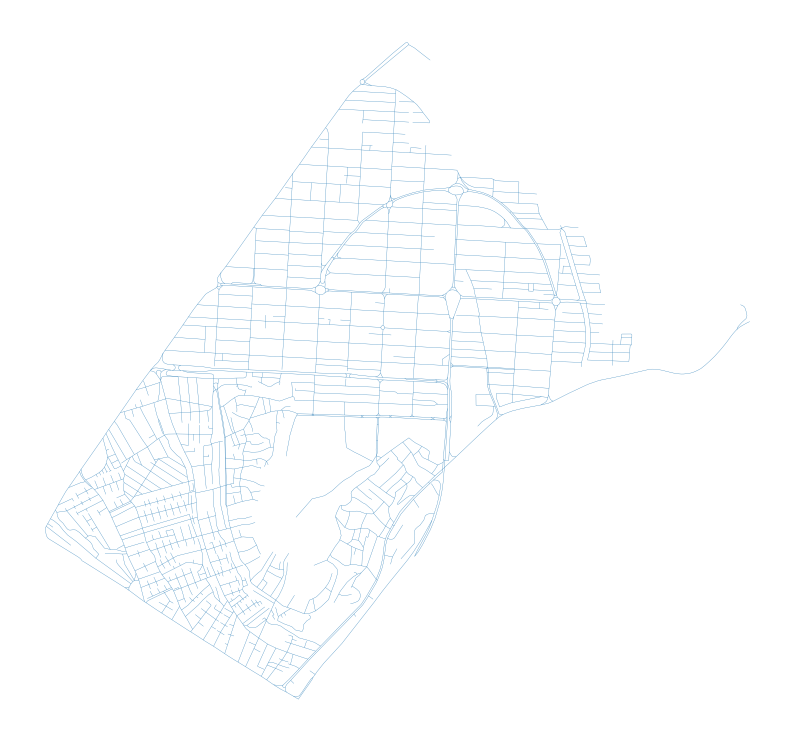

  0%|          | 0/1463 [00:00<?, ?it/s]

In [ ]:
# Urban Network Analysis using Python and Graph Theory

#In this script, we will analyze an urban network using Python and graph theory,
#which is a fundamental method in urban planning and design. We will use the NetworkX
#library to model the urban network as a graph, where intersections are nodes and streets are edges.
#The analysis will include calculating various centrality measures and visualizing the network.


streets_graph = ox.graph_from_place('District 1, karaj, Iran', network_type='drive')
street_graph = ox.projection.project_graph(streets_graph)

edges = ox.graph_to_gdfs(ox.get_undirected(street_graph), nodes=False, edges=True,
                                  node_geometry=False, fill_edge_geometry=True)

f, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=0.2)
ax.set_axis_off()
plt.show()
primal = momepy.gdf_to_nx(edges, approach='primal')
primal = momepy.closeness_centrality(primal, radius=400, name='closeness400', distance='mm_Len', weight='mm_Len',legend=True)
nodes = momepy.nx_to_gdf(primal, lines=False)

nodes['closeness400'] = nodes['closeness400'].apply(lambda x: x*10000)


In [ ]:
!pip install mapclassify
!pip install mapclassify
import mapclassify
#!pip install --upgrade geopandas mapclassify contextily


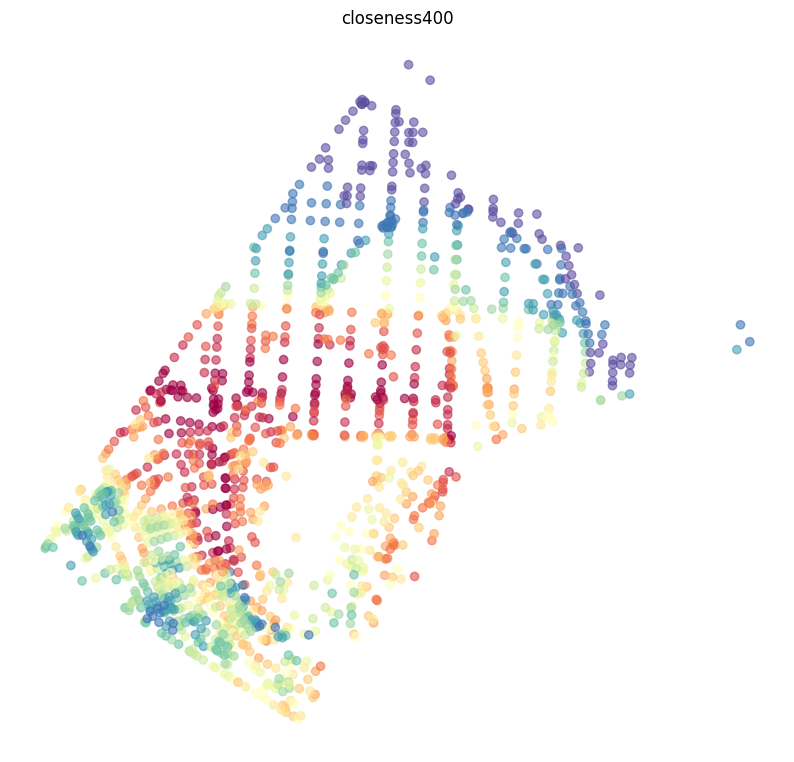

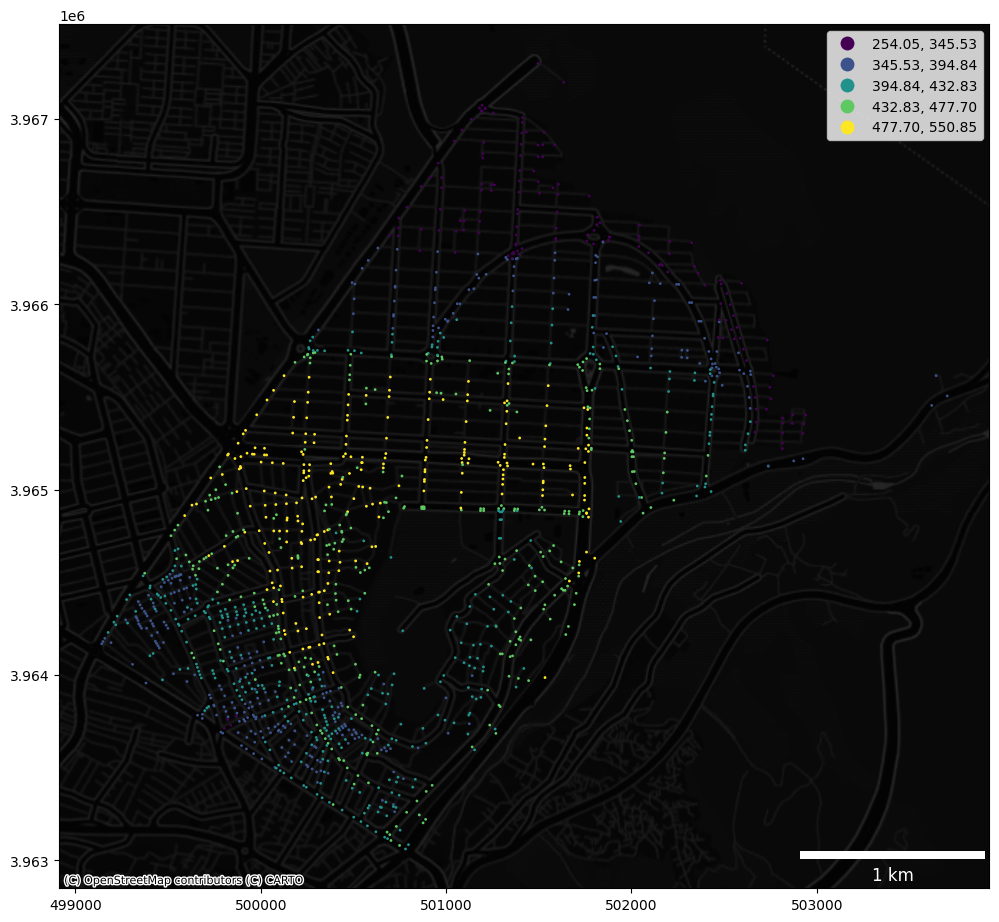

In [ ]:
f,ax = plt.subplots(figsize=(10,10))
nodes.plot(ax=ax, column='closeness400', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('closeness400')
plt.show()
ax = nodes.plot(
    "closeness400",
    scheme="fisherjenkssampled",
    markersize=1,
    legend=True,
    figsize=(12,12),



)
contextily.add_basemap(
    ax,
    crs=nodes.crs,
    source=contextily.providers.CartoDB.DarkMatterNoLabels
)
scalebar = ScaleBar(
    1,
    box_alpha=0,
    location= "lower right",
    color="white",
    length_fraction=0.25,
    font_properties={"size": 12},
)
ax.add_artist(scalebar)

In [ ]:
### Straightness ####

import geopandas as gpd
import momepy
import osmnx as ox
import matplotlib.pyplot as plt
import matplotlib as mpl
import contextily
